<a href="https://colab.research.google.com/github/fauziah-azzhr/PertemuanKedua/blob/main/Pertemuan2Praktikum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving foto1.jpg to foto1.jpg


(np.float64(-0.5), np.float64(959.5), np.float64(1279.5), np.float64(-0.5))

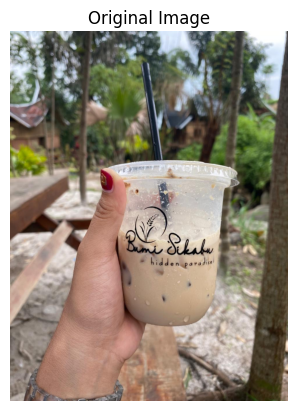

In [1]:
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ambil nama file gambar pertama
filename = list(uploaded.keys())[0]

# Baca gambar
image = cv2.imread(filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

In [2]:
def analyze_color_model_suitability(image, application):
    """
    Analyze which color model is best for specific application
    """

    results = {}

    # Convert ke berbagai model warna
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

    if application == 'skin_detection':
        # Skin detection biasanya pakai HSV atau YCrCb
        lower = np.array([0, 48, 80], dtype=np.uint8)
        upper = np.array([20, 255, 255], dtype=np.uint8)
        mask_hsv = cv2.inRange(hsv, lower, upper)

        lower_y = np.array([0, 133, 77], dtype=np.uint8)
        upper_y = np.array([255, 173, 127], dtype=np.uint8)
        mask_y = cv2.inRange(ycrcb, lower_y, upper_y)

        results['HSV Mask'] = mask_hsv
        results['YCrCb Mask'] = mask_y
        best_model = "HSV / YCrCb"

    elif application == 'shadow_removal':
        # LAB lebih bagus untuk pencahayaan
        l, a, b = cv2.split(lab)
        l_eq = cv2.equalizeHist(l)
        lab_eq = cv2.merge((l_eq, a, b))
        result = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2RGB)

        results['LAB Equalized'] = result
        best_model = "LAB"

    elif application == 'text_extraction':
        # Grayscale untuk threshold
        _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

        results['Threshold'] = thresh
        best_model = "Grayscale"

    elif application == 'object_detection':
        # HSV bagus untuk segmentasi warna
        lower = np.array([0, 50, 50])
        upper = np.array([10, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)

        results['HSV Mask'] = mask
        best_model = "HSV"

    else:
        best_model = "Unknown"

    return best_model, results


Application: skin_detection
Best Model: HSV / YCrCb


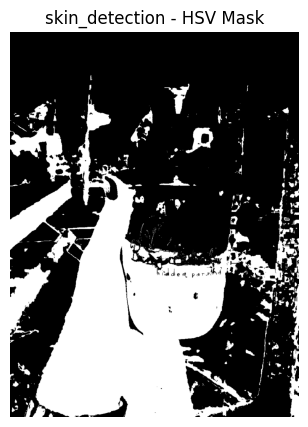

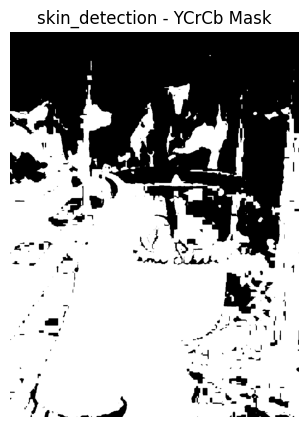


Application: shadow_removal
Best Model: LAB


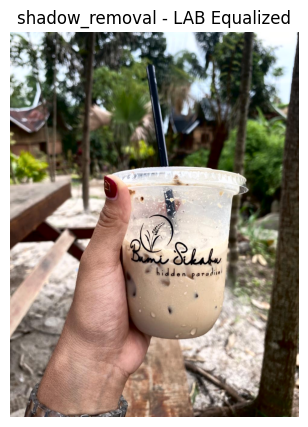


Application: text_extraction
Best Model: Grayscale


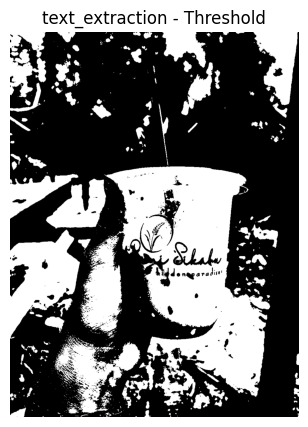


Application: object_detection
Best Model: HSV


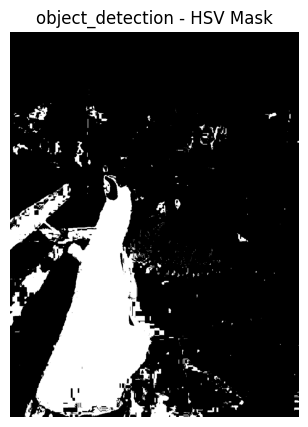

In [3]:
applications = ['skin_detection', 'shadow_removal', 'text_extraction', 'object_detection']

for app in applications:
    print(f"\nApplication: {app}")
    best_model, results = analyze_color_model_suitability(image, app)
    print("Best Model:", best_model)

    for key, value in results.items():
        plt.figure(figsize=(5,5))
        if len(value.shape) == 2:
            plt.imshow(value, cmap='gray')
        else:
            plt.imshow(value)
        plt.title(f"{app} - {key}")
        plt.axis('off')
        plt.show()

In [4]:
def simulate_image_aliasing(image, downsampling_factors):
    """
    Simulate aliasing by downsampling image
    """

    results = {}

    for factor in downsampling_factors:
        # Downsampling (resize kecil)
        small = cv2.resize(image, (image.shape[1]//factor, image.shape[0]//factor), interpolation=cv2.INTER_NEAREST)

        # Upsample kembali
        upsampled = cv2.resize(small, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

        results[f'Factor {factor}'] = upsampled

    return results

In [5]:
def analyze_aliasing(original, processed):
    """
    Hitung perbedaan citra untuk melihat efek aliasing
    """
    diff = cv2.absdiff(original, processed)
    mse = np.mean((original - processed) ** 2)
    return diff, mse

Factor 2 - MSE: 13.53


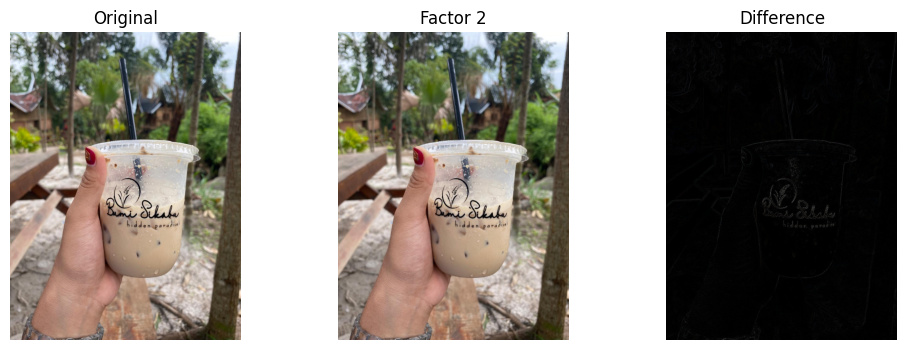

Factor 4 - MSE: 37.14


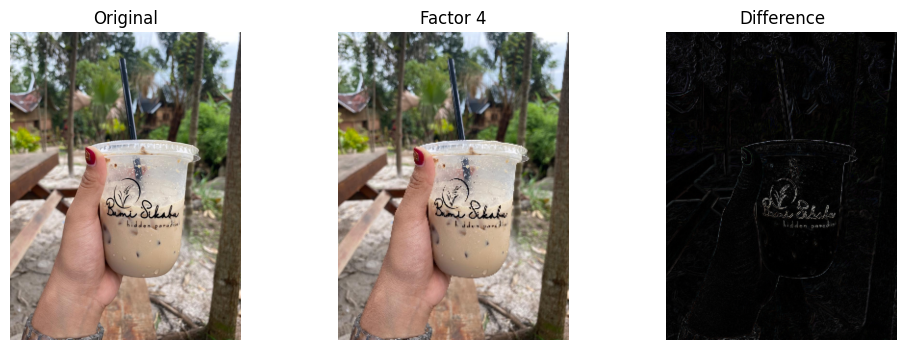

Factor 8 - MSE: 59.03


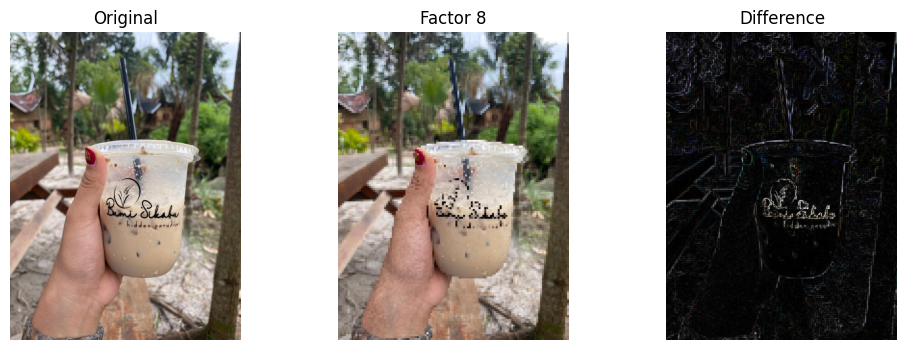

In [6]:
factors = [2, 4, 8]

alias_results = simulate_image_aliasing(image_rgb, factors)

for key, img in alias_results.items():
    diff, mse = analyze_aliasing(image_rgb, img)

    print(f"{key} - MSE: {mse:.2f}")

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(image_rgb)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(img)
    plt.title(key)
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(diff)
    plt.title("Difference")
    plt.axis('off')

    plt.show()